In [269]:
from utils import sheet_to_dataframe
from decouple import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.simplefilter('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [179]:
# read data from google sheet
WORKSHEETSHEET_NAME="missing_data"
SHEET_URL = "https://docs.google.com/spreadsheets/d/1SUlcukpgxf6pfFQbj6DKQZXSlOhyBOSuBdbmQ2ZbhTM/edit#gid=327494290"

data = sheet_to_dataframe(SHEET_URL,WORKSHEETSHEET_NAME)

In [180]:
# brief data preview
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,,Ellis,St,,,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,,11/09/2015,,6,,,,11/03/2016,4000,4000,tourist hotel/motel,143,,,2,,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,,Geary,St,0,,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,,08/03/2017,,7,,,,12/03/2017,1,500,tourist hotel/motel,,,,2,,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,,Pacific,Av,,,installation of separating wall,withdrawn,09/26/2017,05/27/2016,,,,,6,6,,,,20000,,retail sales,39,retail sales,39,2,,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,,Pacific,Av,0,,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,,2,2,,,07/13/2018,2000,2000,1 family dwelling,1,1 family dwelling,1,2,,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,,Market,St,,,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,,11/20/2017,,3,,,,12/01/2018,100000,100000,retail sales,,,,2,,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11


# EDA

In [181]:
# make copy of truth data to make analysis
df = data.copy()

# get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           15364 non-null  object 
 1   Permit Type                             15364 non-null  int64  
 2   Permit Type Definition                  15364 non-null  object 
 3   Permit Creation Date                    15364 non-null  object 
 4   Block                                   15364 non-null  object 
 5   Lot                                     15364 non-null  object 
 6   Street Number                           15364 non-null  int64  
 7   Street Number Suffix                    15364 non-null  object 
 8   Street Name                             15364 non-null  object 
 9   Street Suffix                           15364 non-null  object 
 10  Unit                                    15364 non-null  ob

- The datatypes in some of the columns do not match the actual values in the dataset
- The `info()` function tends to show that no null values exits in the dataset although you can physically seen the null values from the `.head()` function   
- It seems pandas cannot interprete `" "` (empty) obj values as null

In [182]:
# fill empty str values with "NaN"
df.replace('', pd.NA, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           15364 non-null  object 
 1   Permit Type                             15364 non-null  int64  
 2   Permit Type Definition                  15364 non-null  object 
 3   Permit Creation Date                    15364 non-null  object 
 4   Block                                   15364 non-null  object 
 5   Lot                                     15364 non-null  object 
 6   Street Number                           15364 non-null  int64  
 7   Street Number Suffix                    160 non-null    object 
 8   Street Name                             15364 non-null  object 
 9   Street Suffix                           15170 non-null  object 
 10  Unit                                    2147 non-null   ob

In [183]:
def find_percentage_missing(data):
    # find columns with missing values
    column_na=[features for features in data.columns if data[features].isnull().sum()>1]

    result_list = []

    for feature in column_na:
        missing_percentage = np.round(data[feature].isnull().mean() * 100, 2)
        result_list.append({'Column Name': feature, 'Missing Values Percentage': missing_percentage})

    return pd.DataFrame(result_list)

find_percentage_missing(df)

,Column Name,Missing Values Percentage
0,Street Number Suffix,98.96
1,Street Suffix,1.26
2,Unit,86.03
3,Unit Suffix,98.83
4,Description,0.16
5,Issued Date,4.13
6,Completed Date,40.58
7,First Construction Document Date,4.16
8,Structural Notification,96.95
9,Number of Existing Stories,20.76


In [184]:
# create a datatype  dict
data_type_mapping = {
    'Permit Type': 'int64',
    'Street Number': 'int64',
    'Unit': 'float64',
    'Number of Existing Stories': 'int64',
    'Number of Proposed Stories': 'int64',
    'Estimated Cost': 'float64',
    'Revised Cost': 'float64',
    'Existing Units': 'float64',
    'Proposed Units': 'int64',
    'Plansets': 'int64',
    'TIDF Compliance': 'float64',
    'Existing Construction Type': 'int64',
    'Proposed Construction Type': 'int64',
    'Supervisor District': 'int64',
    'Zipcode': 'int64',
    'Record ID': 'int64'
}

# used -1 as no numerical column has -1 as a value (pd cannot cast NaN as Integer or Float)
for col in data_type_mapping:
        df[col].fillna(-1, inplace=True)

# convert respective columns to the right types
df = df.astype(data_type_mapping)

# # fill NaN as standard for empty values
# df.replace(-1, np.nan, inplace=True)

In [185]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,<NA>,Ellis,St,-1.0,<NA>,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,<NA>,11/09/2015,<NA>,6,-1,<NA>,<NA>,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,<NA>,-1,2,-1.0,3,constr type 3,-1,<NA>,<NA>,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1380610000000
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,<NA>,Geary,St,0.0,<NA>,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,<NA>,08/03/2017,<NA>,7,-1,<NA>,<NA>,12/03/2017,1.0,500.0,tourist hotel/motel,-1.0,<NA>,-1,2,-1.0,3,constr type 3,-1,<NA>,<NA>,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1420160000000
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,<NA>,Pacific,Av,-1.0,<NA>,installation of separating wall,withdrawn,09/26/2017,05/27/2016,<NA>,<NA>,<NA>,<NA>,6,6,<NA>,<NA>,<NA>,20000.0,-1.0,retail sales,39.0,retail sales,39,2,-1.0,1,constr type 1,1,constr type 1,<NA>,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1424860000000
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,<NA>,Pacific,Av,0.0,<NA>,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,<NA>,2,2,<NA>,<NA>,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1,2,-1.0,5,wood frame (5),5,wood frame (5),<NA>,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1443570000000
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,<NA>,Market,St,-1.0,<NA>,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,<NA>,11/20/2017,<NA>,3,-1,<NA>,<NA>,12/01/2018,100000.0,100000.0,retail sales,-1.0,<NA>,-1,2,-1.0,3,constr type 3,-1,<NA>,<NA>,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",144548000000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           15364 non-null  object 
 1   Permit Type                             15364 non-null  int64  
 2   Permit Type Definition                  15364 non-null  object 
 3   Permit Creation Date                    15364 non-null  object 
 4   Block                                   15364 non-null  object 
 5   Lot                                     15364 non-null  object 
 6   Street Number                           15364 non-null  int64  
 7   Street Number Suffix                    160 non-null    object 
 8   Street Name                             15364 non-null  object 
 9   Street Suffix                           15170 non-null  object 
 10  Unit                                    15364 non-null  fl

In [187]:
# list of variables that contain Date information
date_feature = [feature for feature in df.columns if 'Date' in feature in feature]
date_feature

['Permit Creation Date',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Permit Expiration Date']

In [188]:
df[date_feature] = df[date_feature].apply(pd.to_datetime)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Permit Number                           15364 non-null  object        
 1   Permit Type                             15364 non-null  int64         
 2   Permit Type Definition                  15364 non-null  object        
 3   Permit Creation Date                    15364 non-null  datetime64[ns]
 4   Block                                   15364 non-null  object        
 5   Lot                                     15364 non-null  object        
 6   Street Number                           15364 non-null  int64         
 7   Street Number Suffix                    160 non-null    object        
 8   Street Name                             15364 non-null  object        
 9   Street Suffix                           15170 non-

In [190]:
# location column 
# Extract and convert latitude and longitude
df[['Latitude', 'Longitude']] = df['Location'].str.extract(r'\((.*),\s*(.*)\)').astype(float)
df.drop('Location', axis=1, inplace=True)

In [191]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Record ID,Latitude,Longitude
0,201505000000.0,4,sign - erect,2015-05-06,326,23,140,<NA>,Ellis,St,-1.0,<NA>,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,<NA>,6,-1,<NA>,<NA>,2016-11-03,4000.0,4000.0,tourist hotel/motel,143.0,<NA>,-1,2,-1.0,3,constr type 3,-1,<NA>,<NA>,3,Tenderloin,94102,1380610000000,37.785719,-122.408523
1,201604000000.0,4,sign - erect,2016-04-19,306,7,440,<NA>,Geary,St,0.0,<NA>,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,<NA>,7,-1,<NA>,<NA>,2017-12-03,1.0,500.0,tourist hotel/motel,-1.0,<NA>,-1,2,-1.0,3,constr type 3,-1,<NA>,<NA>,3,Tenderloin,94102,1420160000000,37.787340,-122.410632
2,201605000000.0,3,additions alterations or repairs,2016-05-27,595,203,1647,<NA>,Pacific,Av,-1.0,<NA>,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,NaT,<NA>,6,6,<NA>,<NA>,NaT,20000.0,-1.0,retail sales,39.0,retail sales,39,2,-1.0,1,constr type 1,1,constr type 1,<NA>,3,Russian Hill,94109,1424860000000,37.794657,-122.422326
3,201611000000.0,8,otc alterations permit,2016-11-07,156,11,1230,<NA>,Pacific,Av,0.0,<NA>,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,<NA>,2,2,<NA>,<NA>,2018-07-13,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1,2,-1.0,5,wood frame (5),5,wood frame (5),<NA>,3,Nob Hill,94109,1443570000000,37.795959,-122.415574
4,201611000000.0,6,demolitions,2016-11-28,342,1,950,<NA>,Market,St,-1.0,<NA>,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,<NA>,3,-1,<NA>,<NA>,2018-12-01,100000.0,100000.0,retail sales,-1.0,<NA>,-1,2,-1.0,3,constr type 3,-1,<NA>,<NA>,6,Tenderloin,94102,144548000000,37.783153,-122.409509


In [192]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
drop_cat = ["Permit Number", "Block", "Lot", "Street Name", "Description"]
categorical_features = [item for item in categorical_features if item not in drop_cat]
categorical_features

['Permit Type Definition',
 'Street Number Suffix',
 'Street Suffix',
 'Unit Suffix',
 'Current Status',
 'Structural Notification',
 'Voluntary Soft-Story Retrofit',
 'Fire Only Permit',
 'Existing Use',
 'Proposed Use',
 'Existing Construction Type Description',
 'Proposed Construction Type Description',
 'Site Permit',
 'Neighborhoods - Analysis Boundaries']

In [193]:
categorical_info = []
for feature in categorical_features:
    feature_info = {
        'Feature': feature,
        'Categories': len(df[feature].unique()),
        'Unique Values': df[feature].unique()
    }
    categorical_info.append(feature_info)
df_info = pd.DataFrame(categorical_info)
df_info

,Feature,Categories,Unique Values
0,Permit Type Definition,8,"[sign - erect, additions alterations or repair..."
1,Street Number Suffix,10,"[<NA>, A, C, V, B, F, R, D, 0, E]"
2,Street Suffix,17,"[St, Av, Tr, Ct, Bl, Wy, Dr, <NA>, Rd, Cr, Pl,..."
3,Unit Suffix,52,"[<NA>, A, D, BLDG 1, C, B, E, FRONT, F, COMML,..."
4,Current Status,12,"[expired, issued, withdrawn, complete, filed, ..."
5,Structural Notification,2,"[<NA>, Y]"
6,Voluntary Soft-Story Retrofit,2,"[<NA>, Y]"
7,Fire Only Permit,2,"[<NA>, Y]"
8,Existing Use,64,"[tourist hotel/motel, retail sales, 1 family d..."
9,Proposed Use,70,"[<NA>, retail sales, 1 family dwelling, apartm..."


In [194]:
# Numerical values
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['Permit Type',
 'Permit Creation Date',
 'Street Number',
 'Unit',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Permit Expiration Date',
 'Estimated Cost',
 'Revised Cost',
 'Existing Units',
 'Proposed Units',
 'Plansets',
 'TIDF Compliance',
 'Existing Construction Type',
 'Proposed Construction Type',
 'Supervisor District',
 'Zipcode',
 'Record ID',
 'Latitude',
 'Longitude']

# Handle Missing Values

In [195]:
# recall from NaN values percentage 
large_na_columns=["Street Number Suffix", 
                  "Unit", "Unit Suffix","TIDF Compliance", 
                  "Voluntary Soft-Story Retrofit", "Site Permit", 
                  "Structural Notification", "Fire Only Permit"]
df1 = df.drop(columns=large_na_columns)

df1.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Record ID,Latitude,Longitude
0,201505000000.0,4,sign - erect,2015-05-06,326,23,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,6,-1,2016-11-03,4000.0,4000.0,tourist hotel/motel,143.0,<NA>,-1,2,3,constr type 3,-1,<NA>,3,Tenderloin,94102,1380610000000,37.785719,-122.408523
1,201604000000.0,4,sign - erect,2016-04-19,306,7,440,Geary,St,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,7,-1,2017-12-03,1.0,500.0,tourist hotel/motel,-1.0,<NA>,-1,2,3,constr type 3,-1,<NA>,3,Tenderloin,94102,1420160000000,37.787340,-122.410632
2,201605000000.0,3,additions alterations or repairs,2016-05-27,595,203,1647,Pacific,Av,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,NaT,6,6,NaT,20000.0,-1.0,retail sales,39.0,retail sales,39,2,1,constr type 1,1,constr type 1,3,Russian Hill,94109,1424860000000,37.794657,-122.422326
3,201611000000.0,8,otc alterations permit,2016-11-07,156,11,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,2,2,2018-07-13,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1,2,5,wood frame (5),5,wood frame (5),3,Nob Hill,94109,1443570000000,37.795959,-122.415574
4,201611000000.0,6,demolitions,2016-11-28,342,1,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,3,-1,2018-12-01,100000.0,100000.0,retail sales,-1.0,<NA>,-1,2,3,constr type 3,-1,<NA>,6,Tenderloin,94102,144548000000,37.783153,-122.409509


In [199]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Permit Number                           15364 non-null  object        
 1   Permit Type                             15364 non-null  int64         
 2   Permit Type Definition                  15364 non-null  object        
 3   Permit Creation Date                    15364 non-null  datetime64[ns]
 4   Block                                   15364 non-null  object        
 5   Lot                                     15364 non-null  object        
 6   Street Number                           15364 non-null  int64         
 7   Street Name                             15364 non-null  object        
 8   Street Suffix                           15170 non-null  object        
 9   Description                             15339 non-

In [202]:
columns_with_minus_one = df1.eq(-1).any()
numerical_cols_processed = columns_with_minus_one[columns_with_minus_one].index.tolist()
df1[numerical_cols_processed]

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode
0,6,-1,4000.0,4000.0,143.0,-1,2,3,-1,3,94102
1,7,-1,1.0,500.0,-1.0,-1,2,3,-1,3,94102
2,6,6,20000.0,-1.0,39.0,39,2,1,1,3,94109
3,2,2,2000.0,2000.0,1.0,1,2,5,5,3,94109
4,3,-1,100000.0,100000.0,-1.0,-1,2,3,-1,6,94102
...,...,...,...,...,...,...,...,...,...,...,...
15359,2,2,8000.0,28000.0,1.0,1,0,5,5,11,94112
15360,2,2,2000.0,2000.0,2.0,2,2,5,5,9,94110
15361,2,2,2000.0,2000.0,2.0,2,2,5,5,9,94110
15362,2,2,26000.0,26000.0,8.0,8,0,5,5,10,94107


In [230]:
mode_value_ex_stories = df1['Number of Existing Stories'].replace(-1, np.nan).mode().values[0]
df1['Number of Existing Stories'] = df1['Number of Existing Stories'].replace(-1, mode_value_ex_stories).astype(int)

In [231]:
mode_value_prop_stories = df1['Number of Proposed Stories'].replace(-1, np.nan).mode().values[0]
df1['Number of Proposed Stories'] = df1['Number of Proposed Stories'].replace(-1, mode_value_prop_stories).astype(int)

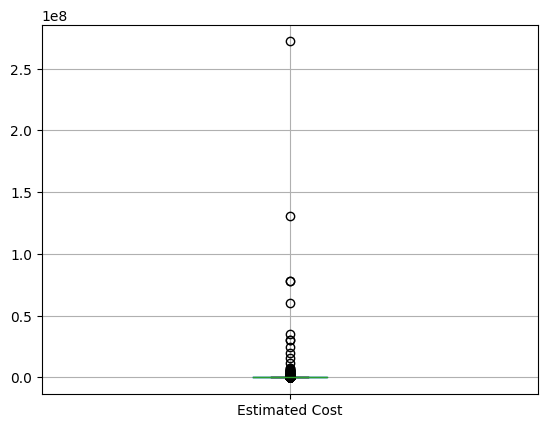

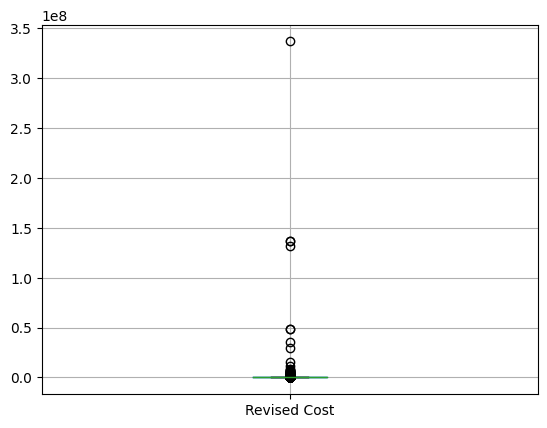

In [225]:
df1.boxplot(column="Estimated Cost")
plt.show()

df1.boxplot(column="Revised Cost")
plt.show()

In [236]:
# price columns
median_value_est_cost = df1['Estimated Cost'].replace(-1, np.nan).median()
df1['Estimated Cost'] = df1['Estimated Cost'].replace(-1, median_value_est_cost).astype(float)

median_value_rev_cost = df1['Revised Cost'].replace(-1, np.nan).median()
df1['Revised Cost'] = df1['Revised Cost'].replace(-1, median_value_rev_cost).astype(float)


In [238]:
# Existing Units
mode_value_ext_unit = df1['Existing Units'].replace(-1, np.nan).mode().values[0]
df1['Existing Units'] = df1['Existing Units'].replace(-1, mode_value_ext_unit).astype(int)

In [239]:
# Proposed Units
mode_value_prop_unit = df1['Proposed Units'].replace(-1, np.nan).mode().values[0]
df1['Proposed Units'] = df1['Proposed Units'].replace(-1, mode_value_prop_unit).astype(int)

In [240]:
# Plansets
mode_value_planset = df1['Plansets'].replace(-1, np.nan).mode().values[0]
df1['Plansets'] = df1['Plansets'].replace(-1, mode_value_planset).astype(int)

In [241]:
# Existing Construction Type
mode_ext_construction = df1['Existing Construction Type'].replace(-1, np.nan).mode().values[0]
df1['Existing Construction Type'] = df1['Existing Construction Type'].replace(-1, mode_ext_construction).astype(int)

In [242]:
# Proposed Construction Type
mode_prop_construction = df1['Proposed Construction Type'].replace(-1, np.nan).mode().values[0]
df1['Proposed Construction Type'] = df1['Proposed Construction Type'].replace(-1, mode_prop_construction).astype(int)

In [244]:
# Supervisor District
mode_sup_district = df1['Supervisor District'].replace(-1, np.nan).mode().values[0]
df1['Supervisor District'] = df1['Supervisor District'].replace(-1, mode_sup_district).astype(int)

In [245]:
# Zipcode
mode_zip = df1['Zipcode'].replace(-1, np.nan).mode().values[0]
df1['Zipcode'] = df1['Zipcode'].replace(-1, mode_value_planset).astype(int)

In [246]:
df1.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Record ID,Latitude,Longitude
0,201505000000.0,4,sign - erect,2015-05-06,326,23,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,6,2,2016-11-03,4000.0,4000.0,tourist hotel/motel,143,<NA>,1,2,3,constr type 3,5,<NA>,3,Tenderloin,94102,1380610000000,37.785719,-122.408523
1,201604000000.0,4,sign - erect,2016-04-19,306,7,440,Geary,St,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,7,2,2017-12-03,1.0,500.0,tourist hotel/motel,1,<NA>,1,2,3,constr type 3,5,<NA>,3,Tenderloin,94102,1420160000000,37.787340,-122.410632
2,201605000000.0,3,additions alterations or repairs,2016-05-27,595,203,1647,Pacific,Av,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,NaT,6,6,NaT,20000.0,1.0,retail sales,39,retail sales,39,2,1,constr type 1,1,constr type 1,3,Russian Hill,94109,1424860000000,37.794657,-122.422326
3,201611000000.0,8,otc alterations permit,2016-11-07,156,11,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,2,2,2018-07-13,2000.0,2000.0,1 family dwelling,1,1 family dwelling,1,2,5,wood frame (5),5,wood frame (5),3,Nob Hill,94109,1443570000000,37.795959,-122.415574
4,201611000000.0,6,demolitions,2016-11-28,342,1,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,3,2,2018-12-01,100000.0,100000.0,retail sales,1,<NA>,1,2,3,constr type 3,5,<NA>,6,Tenderloin,94102,144548000000,37.783153,-122.409509


In [200]:
# handle numerical missing data
new_numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'object']

find_percentage_missing(df1[new_numerical_features])

,Column Name,Missing Values Percentage
0,Issued Date,4.13
1,Completed Date,40.58
2,First Construction Document Date,4.16
3,Permit Expiration Date,22.52
4,Latitude,0.77
5,Longitude,0.77


In [247]:
df1.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [249]:
mode_issue_date = df1['Issued Date'].mode()
df1['Issued Date'].fillna(mode_issue_date, inplace=True)

# First Construction Document Date
mode_first_con_date = df1['First Construction Document Date'].mode()
df1['First Construction Document Date'].fillna(mode_first_con_date, inplace=True)

In [253]:
mode_com_date = df1['Completed Date'].mode()
df1['Completed Date'].fillna(mode_com_date, inplace=True)

In [254]:
# Permit Expiration Date
mode_pem_exp_date = df1['Permit Expiration Date'].mode()
df1['Permit Expiration Date'].fillna(mode_pem_exp_date, inplace=True)

#### categorical 

In [259]:
categorical_features=[feature for feature in df1.columns if df1[feature].dtypes=='O']

categorical_info = []
for feature in categorical_features:
    feature_info = {
        'Feature': feature,
        'Categories': len(df1[feature].unique()),
        'Unique Values': df1[feature].unique()
    }
    categorical_info.append(feature_info)
df_info = pd.DataFrame(categorical_info)
df_info

,Feature,Categories,Unique Values
0,Permit Number,2619,"[201505000000.0, 201604000000.0, 201605000000...."
1,Permit Type Definition,8,"[sign - erect, additions alterations or repair..."
2,Block,3473,"[326, 306, 595, 156, 342, 4105, 1739, 4789, 12..."
3,Lot,504,"[23, 7, 203, 11, 1, 9, 20, 14, 54, 16, 21, 002..."
4,Street Name,1118,"[Ellis, Geary, Pacific, Market, Indiana, 11th,..."
5,Street Suffix,17,"[St, Av, Tr, Ct, Bl, Wy, Dr, <NA>, Rd, Cr, Pl,..."
6,Description,10748,"[ground fl facade: to erect illuminated, elect..."
7,Current Status,12,"[expired, issued, withdrawn, complete, filed, ..."
8,Existing Use,64,"[tourist hotel/motel, retail sales, 1 family d..."
9,Proposed Use,70,"[<NA>, retail sales, 1 family dwelling, apartm..."


In [260]:
find_percentage_missing(df1[categorical_features])

,Column Name,Missing Values Percentage
0,Street Suffix,1.26
1,Description,0.16
2,Existing Use,20.06
3,Proposed Use,21.56
4,Existing Construction Type Description,20.99
5,Proposed Construction Type Description,22.11


In [261]:
df1.dropna(subset=['Description', 'Street Suffix'], inplace=True)

In [262]:
# Existing Use
mode_ext_use = df1['Existing Use'].mode()
df1['Existing Use'].fillna(mode_ext_use, inplace=True)

# Proposed Use	
mode_prpo_use = df1['Proposed Use'].mode()
df1['Proposed Use'].fillna(mode_prpo_use, inplace=True)

In [270]:
# fill description
list_desc = ["Existing Construction Type Description","Proposed Construction Type Description"]
df1[list_desc].fillna("No description", inplace=True)

In [268]:
df1.to_csv('cleanedData.csv', index=False)